<a href="https://colab.research.google.com/github/abhash896/Neural_network_training_on_GPU/blob/master/Logistic_Regression/Pytorch_images_and_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing important libraries
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
# Downloading the training dataset if it is not already present
dataset = MNIST(root = 'data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(dataset)

60000

In [ ]:
test_dataset = MNIST(root='data/', train=False)

In [ ]:
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F2500BF74C0>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


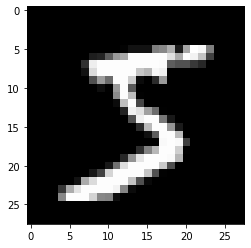

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ', label)

In [ ]:
dataset[3]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F2430AE7760>, 1)

Pytorch doesn't know how to work with images. we need to convert the images into tensors. we can do this by specifying a transform while creating our dataset.

In [ ]:
import torchvision.transforms as transforms

Pytorch datasets allow us to specify one or more transformation functions that are applied to the images as they are loaded. The `torchvision.transforms` module contains many such predefined functions. we'll use the `ToTensor` transform to convert images into pytorch tensors.

In [ ]:
dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())

In [ ]:
dataset[0][0].shape

torch.Size([1, 28, 28])

In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images.

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. we can do this using the `random_split` method from pytorch.

In [ ]:
 from torch.utils.data import random_split

In [ ]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

We can now create data loaders to help us load the data in batches. we will use a batch size of 128.

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)
                          

In [ ]:
import torch.nn as nn

In [ ]:
input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
model.bias.shape

torch.Size([10])

In [ ]:
model.weight.shape

torch.Size([10, 784])

We will take the first batch of 100 images from our dataset and pass them into our model.

In [ ]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs=model(images)
  break


tensor([6, 6, 2, 7, 7, 0, 0, 0, 4, 3, 5, 0, 9, 6, 3, 8, 5, 8, 0, 7, 1, 8, 8, 8,
        7, 8, 6, 4, 6, 7, 3, 3, 7, 9, 6, 1, 0, 1, 4, 1, 9, 0, 6, 7, 6, 8, 5, 3,
        5, 4, 2, 6, 1, 9, 8, 7, 5, 4, 5, 0, 6, 7, 2, 8, 4, 9, 8, 4, 2, 3, 2, 9,
        6, 9, 0, 4, 5, 1, 7, 4, 0, 7, 1, 1, 4, 6, 2, 3, 6, 9, 4, 5, 9, 5, 4, 9,
        8, 9, 4, 1, 4, 3, 5, 2, 7, 0, 7, 0, 1, 5, 8, 4, 0, 4, 1, 2, 2, 7, 4, 3,
        7, 7, 6, 1, 7, 1, 6, 0])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

The code above leads to an error because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them. We'll use the `.reshape` method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. To include this additional functionality within our model, we need to define a custom model by extending the `nn.Module` class from Pytorch.

In [ ]:
images.shape

torch.Size([128, 1, 28, 28])

In [ ]:
images.reshape(128, 784)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
images.shape

torch.Size([128, 1, 28, 28])

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out


In [ ]:
model = MnistModel()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0116, -0.0225,  0.0270,  ...,  0.0263, -0.0080,  0.0096],
         [-0.0344, -0.0187, -0.0193,  ...,  0.0109,  0.0100, -0.0287],
         [ 0.0161, -0.0078, -0.0350,  ..., -0.0224,  0.0163, -0.0161],
         ...,
         [ 0.0346,  0.0097,  0.0067,  ...,  0.0333, -0.0044, -0.0303],
         [-0.0053, -0.0311,  0.0212,  ...,  0.0261,  0.0277,  0.0211],
         [-0.0341,  0.0172,  0.0203,  ..., -0.0039,  0.0152, -0.0010]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0205,  0.0118, -0.0326, -0.0146,  0.0306, -0.0268, -0.0206, -0.0274,
         -0.0065, -0.0295], requires_grad=True)]

We can use our new custom model in the same way as before. Let's see if it works.

In [ ]:
for images, labels in train_loader:
  outputs = model(images)
  break

print('output.shape: ', outputs.shape)
print('sample outputs : ', outputs[:2].data)

output.shape:  torch.Size([128, 10])
sample outputs :  tensor([[-0.0582, -0.0863, -0.1863,  0.1589, -0.0265,  0.0004,  0.1394, -0.0285,
         -0.0903, -0.1123],
        [ 0.3014,  0.1992, -0.0108,  0.0323,  0.0523, -0.1877,  0.0926, -0.0560,
         -0.1074, -0.1939]])


The softmax function is included in the` torch.nn.functional` package and requires us to specify a dimension along which the function should be applied.

In [ ]:
import torch.nn.functional as F

In [ ]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print('Sample probabilities: ', probs[:2].data)

# Add up the probabilities of an output row
print('Sum: ', torch.sum(probs[0]).item())

Sample probabilities:  tensor([[0.0966, 0.0939, 0.0850, 0.1200, 0.0997, 0.1024, 0.1177, 0.0995, 0.0936,
         0.0915],
        [0.1320, 0.1192, 0.0966, 0.1009, 0.1029, 0.0809, 0.1071, 0.0923, 0.0877,
         0.0804]])
Sum:  1.0


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using `torch.max`, which returns each row's largest element and the corresponding index.

In [ ]:
max_probs, preds = torch.max(probs, dim = 1)
print(max_probs)
print(preds)

tensor([0.1200, 0.1320, 0.1332, 0.1213, 0.1361, 0.1204, 0.1391, 0.1128, 0.1325,
        0.1373, 0.1347, 0.1292, 0.1367, 0.1140, 0.1504, 0.1152, 0.1367, 0.1304,
        0.1254, 0.1162, 0.1274, 0.1531, 0.1401, 0.1468, 0.1178, 0.1247, 0.1345,
        0.1172, 0.1528, 0.1139, 0.1164, 0.1303, 0.1141, 0.1366, 0.1155, 0.1265,
        0.1312, 0.1399, 0.1343, 0.1145, 0.1265, 0.1294, 0.1150, 0.1206, 0.1325,
        0.1385, 0.1318, 0.1361, 0.1322, 0.1178, 0.1440, 0.1337, 0.1207, 0.1310,
        0.1268, 0.1235, 0.1427, 0.1438, 0.1146, 0.1331, 0.1257, 0.1235, 0.1334,
        0.1467, 0.1350, 0.1194, 0.1535, 0.1396, 0.1421, 0.1223, 0.1272, 0.1268,
        0.1276, 0.1222, 0.1216, 0.1132, 0.1303, 0.1304, 0.1175, 0.1346, 0.1170,
        0.1364, 0.1527, 0.1313, 0.1374, 0.1326, 0.1294, 0.1311, 0.1145, 0.1110,
        0.1337, 0.1235, 0.1311, 0.1296, 0.1433, 0.1432, 0.1300, 0.1154, 0.1239,
        0.1446, 0.1327, 0.1133, 0.1336, 0.1523, 0.1551, 0.1178, 0.1192, 0.1574,
        0.1289, 0.1468, 0.1336, 0.1235, 

In [ ]:
probs[1][torch.argmax(probs[1]).item()]

tensor(0.1320, grad_fn=<SelectBackward0>)

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.0234)

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

It's not a differential function. torch.max() and == are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements.

For these reasons, acuracy is often used an an evaluation metric for classification but not as a loss function. A commonly used loss function for classification problems is the cross-entropy.


Pytorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the torch.nn.functional package. Moreover, it also performs softmax internallly, so we can directly pass in the model's outputs without converting them into probabilities.

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
loss_fn(outputs, labels)

tensor(2.3113, grad_fn=<NllLossBackward0>)

In [ ]:
# Defining a function to train the model.

def fit(epochs, lr, model, train_loader, val_loader, opt_funct = torch.optim.SGD):
  optimizer = opt_funct(model.parameters(), lr)
  log = []

  for epoch in range(epochs):
    # Training phase
    for batch in train_loader:
      loss = model.training_step(batch) # yet to define the training_step function.
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # validation phase
    result = evaluate(model, val_loader) # not yet defined.
    model.epoch_end(epoch, result)
    log.append(result)

  return log



In [ ]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)                      # Generate predictions
    loss = F.cross_entropy(out, labels)     # Calculate loss
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)                      # Generate predictions
    loss = F.cross_entropy(out, labels)     # calculate loss
    acc = accuracy(out, labels)             # calculate accuracy
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()       # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()          # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print(f'Epoch [{epoch}], val_loss: {result["val_loss"]}, val_acc: {result["val_acc"]}')




In [ ]:
model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3370022773742676, 'val_acc': 0.07644382864236832}

In [ ]:
hist1 = fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.968281865119934, val_acc: 0.5995846390724182
Epoch [1], val_loss: 1.6950569152832031, val_acc: 0.7278481125831604
Epoch [2], val_loss: 1.4908756017684937, val_acc: 0.7617682218551636
Epoch [3], val_loss: 1.336888074874878, val_acc: 0.7834256291389465
Epoch [4], val_loss: 1.2184637784957886, val_acc: 0.7971716523170471
Epoch [5], val_loss: 1.1255041360855103, val_acc: 0.8081487417221069
Epoch [6], val_loss: 1.0510495901107788, val_acc: 0.8140822649002075
Epoch [7], val_loss: 0.9901068210601807, val_acc: 0.8213014006614685
Epoch [8], val_loss: 0.9394789934158325, val_acc: 0.8254548907279968
Epoch [9], val_loss: 0.8966881632804871, val_acc: 0.8288172483444214


# Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

In [ ]:
# Define test dataset

test_dataset = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())

Let's define a helper function predict_image, which returns the predicted label for a single image tensor.

In [ ]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

`img.unsqueeze` simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.


Label:  0 , Predicted:  0


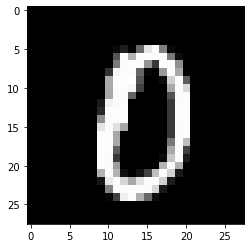

In [ ]:
img, label = test_dataset[55]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [ ]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.8678140640258789, 'val_acc': 0.839550793170929}

# Saving and loading the model

Since we have trained the model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights and bias matrices to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0098, -0.0146,  0.0258,  ..., -0.0094,  0.0033,  0.0191],
                      [-0.0073,  0.0185, -0.0102,  ..., -0.0073, -0.0330, -0.0057],
                      [-0.0344, -0.0147,  0.0208,  ..., -0.0321, -0.0243, -0.0064],
                      ...,
                      [-0.0319, -0.0323, -0.0278,  ..., -0.0123, -0.0020, -0.0304],
                      [ 0.0270,  0.0226,  0.0288,  ..., -0.0222, -0.0225,  0.0151],
                      [-0.0167,  0.0264,  0.0008,  ..., -0.0019,  0.0101,  0.0315]])),
             ('linear.bias',
              tensor([-0.0421,  0.0502, -0.0122, -0.0413,  0.0011, -0.0016, -0.0421,  0.0243,
                      -0.0299, -0.0245]))])

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [ ]:
torch.save(model.state_dict(), 'mnist_logistic.pth')

In [ ]:
model2 = MnistModel()

In [ ]:
evaluate(model2, test_loader)

{'val_loss': 2.3008904457092285, 'val_acc': 0.14179687201976776}

In [ ]:
model2.load_state_dict(torch.load('mnist_logistic.pth'))

<All keys matched successfully>

In [ ]:
hist2 = fit(2, 0.001, model2, train_loader, val_loader)

Epoch [0], val_loss: 1.9431897401809692, val_acc: 0.6265822649002075
Epoch [1], val_loss: 1.6763125658035278, val_acc: 0.7218156456947327


If we have to train the model again with the previous weights, we can load the weights and then start running the fit method which is a custom made function to train the model.

In [ ]:
hist2 = fit(2, 0.001, model2, train_loader, val_loader)

Epoch [0], val_loss: 0.8007360696792603, val_acc: 0.8380142450332642
Epoch [1], val_loss: 0.7763156890869141, val_acc: 0.8402887582778931
